<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on lab: Exploratory Data Analysis - Laptops Pricing dataset**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired throughout the module, to explore the effect of different features on the price of laptops. 


# Objectives

After completing this lab you will be able to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# Install Required Libraries

You can install the required libraries by simply running the `pip install` command with a `%` sign before it. For this environment, `seaborn` library requires installation.


In [ ]:
#import piplite
#await piplite.install('seaborn')

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Import the dataset

You should download the modified version of the data set from the last module. 
Run the following code block to download the CSV file to this environment.


The functions below will download the dataset into your browser:


In [ ]:
#from pyodide.http import pyfetch

#async def download(url, filename):
#    response = await pyfetch(url)
#    if response.status == 200:
#        with open(filename, "wb") as f:
#            f.write(await response.bytes())

In [ ]:
#filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [2]:
#await download(filepath, "laptops.csv")
#file_name="laptops.csv"

Import the file to a pandas dataframe.


In [3]:
#The local file we will use is previously cleaned and saved in this repository
df = pd.read_csv('laptops_CLEANED_NO_INDEX.csv', header=0)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface. While working on the downloaded version of this notebook on their local machines, the learners can simply **skip the steps above**, and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
#df = pd.read_csv(filepath, header=None)

Print the first 5 entries of the dataset to confirm loading.


In [5]:
df.head(5)

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Weight_pound,Screen_Size_inch,CPU_frequency_norm,Price_binned,Screen-Full_HD,Screen-IPS_Panel
0,Acer,4,2,1,5,35.56,1.6,8,256,1.60,978,3.53,14.0,0.551724,Low,False,True
1,Dell,3,1,1,3,39.62,2.0,4,256,2.20,634,4.85,15.6,0.689655,Low,True,False
2,Dell,3,1,1,7,39.62,2.7,8,256,2.20,946,4.85,15.6,0.931034,Low,True,False
3,Dell,4,2,1,5,33.78,1.6,8,128,1.22,1244,2.69,13.3,0.551724,Low,False,True
4,HP,4,2,1,7,39.62,1.8,8,256,1.91,837,4.21,15.6,0.620690,Low,True,False


In [6]:
df.dtypes

Manufacturer           object
Category                int64
GPU                     int64
OS                      int64
CPU_core                int64
Screen_Size_cm        float64
CPU_frequency         float64
RAM_GB                  int64
Storage_GB_SSD          int64
Weight_kg             float64
Price                   int64
Weight_pound          float64
Screen_Size_inch      float64
CPU_frequency_norm    float64
Price_binned           object
Screen-Full_HD           bool
Screen-IPS_Panel         bool
dtype: object

In [7]:
#In this cell, we create a loop that will iterate through the columns and check the data type of each column. If the column is not an integer or float, the loop will print a message stating that the column has a data type that is not a number. If the column is an integer or float, the loop will add the column name to the list 'continuous_values'.
continuous_values = []
for column in df.columns:
    if df[column].dtype != 'object' and df[column].dtype != 'str':
        continuous_values.append(column)

continuous_values

['Category',
 'GPU',
 'OS',
 'CPU_core',
 'Screen_Size_cm',
 'CPU_frequency',
 'RAM_GB',
 'Storage_GB_SSD',
 'Weight_kg',
 'Price',
 'Weight_pound',
 'Screen_Size_inch',
 'CPU_frequency_norm',
 'Screen-Full_HD',
 'Screen-IPS_Panel']

# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


In [8]:
df_cont_vals = df[['CPU_frequency', 'Weight_pound','Screen_Size_inch','Price']]
df_cont_vals.head()

,CPU_frequency,Weight_pound,Screen_Size_inch,Price
0,1.6,3.53,14.0,978
1,2.0,4.85,15.6,634
2,2.7,4.85,15.6,946
3,1.6,2.69,13.3,1244
4,1.8,4.21,15.6,837


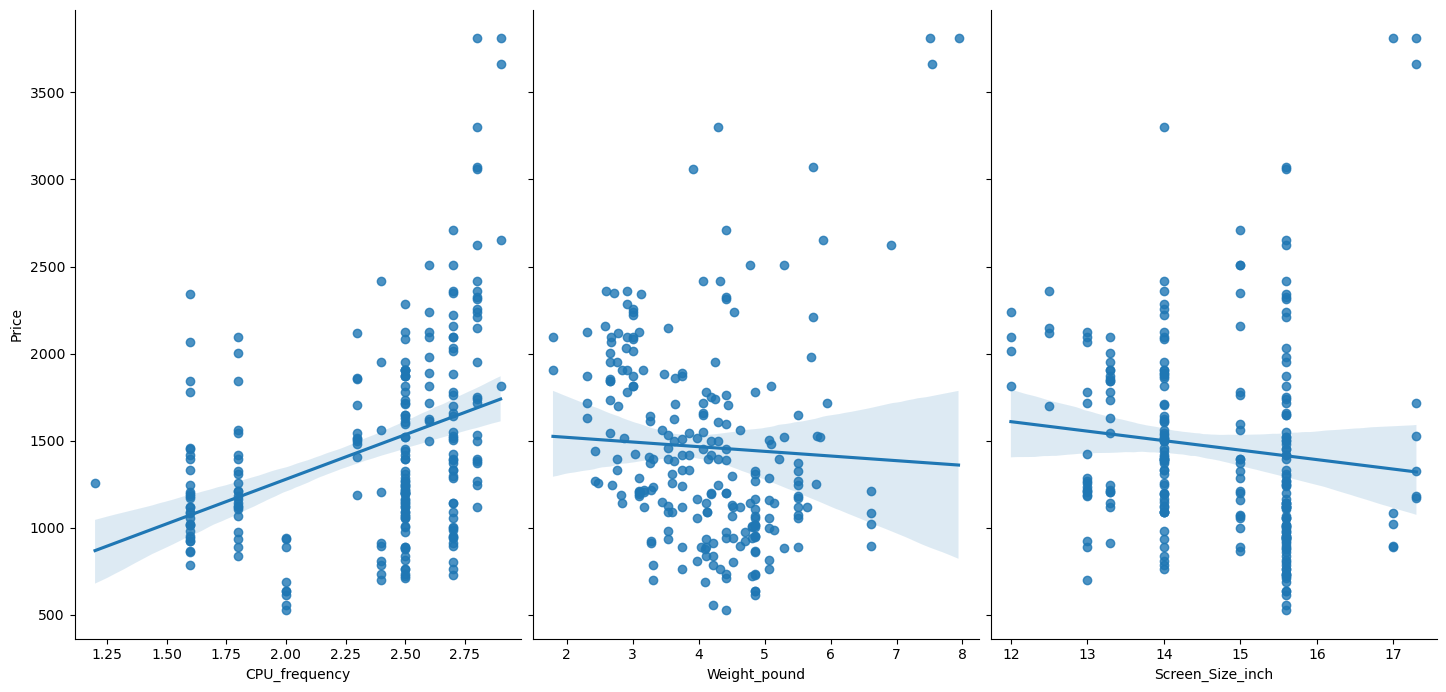

In [10]:
sns.pairplot(df_cont_vals, 
             palette="husl",
             x_vars=['CPU_frequency', 'Weight_pound','Screen_Size_inch'], 
             y_vars='Price', 
             height=7, 
             aspect=0.7, 
             kind='reg')

In [11]:
# Correlation values of the three attributes with Price
df_cont_vals.corr()

,CPU_frequency,Weight_pound,Screen_Size_inch,Price
CPU_frequency,1.000000,0.066555,-0.000948,0.366666
Weight_pound,0.066555,1.000000,0.797585,-0.050221
Screen_Size_inch,-0.000948,0.797585,1.000000,-0.110644
Price,0.366666,-0.050221,-0.110644,1.000000


In [16]:
#P-value of the three attributes with Price
for column in df_cont_vals.columns:
    print(f'***For the {column} vs Price***')
    print(stats.pearsonr(df_cont_vals[column], df_cont_vals['Price']), '\n')

***For the CPU_frequency vs Price***
PearsonRResult(statistic=0.3666655589258864, pvalue=5.502463350713164e-09) 

***For the Weight_pound vs Price***
PearsonRResult(statistic=-0.05022144176916092, pvalue=0.4405964664614228) 

***For the Screen_Size_inch vs Price***
PearsonRResult(statistic=-0.11064420817118288, pvalue=0.08853397846830661) 

***For the Price vs Price***
PearsonRResult(statistic=0.9999999999999998, pvalue=0.0) 



Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


In [35]:
df_catg_vals = df[['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD', 'Price']]
df_catg_vals.head()

,Category,GPU,OS,CPU_core,RAM_GB,Storage_GB_SSD,Price
0,4,2,1,5,8,256,978
1,3,1,1,3,4,256,634
2,3,1,1,7,8,256,946
3,4,2,1,5,8,128,1244
4,4,2,1,7,8,256,837


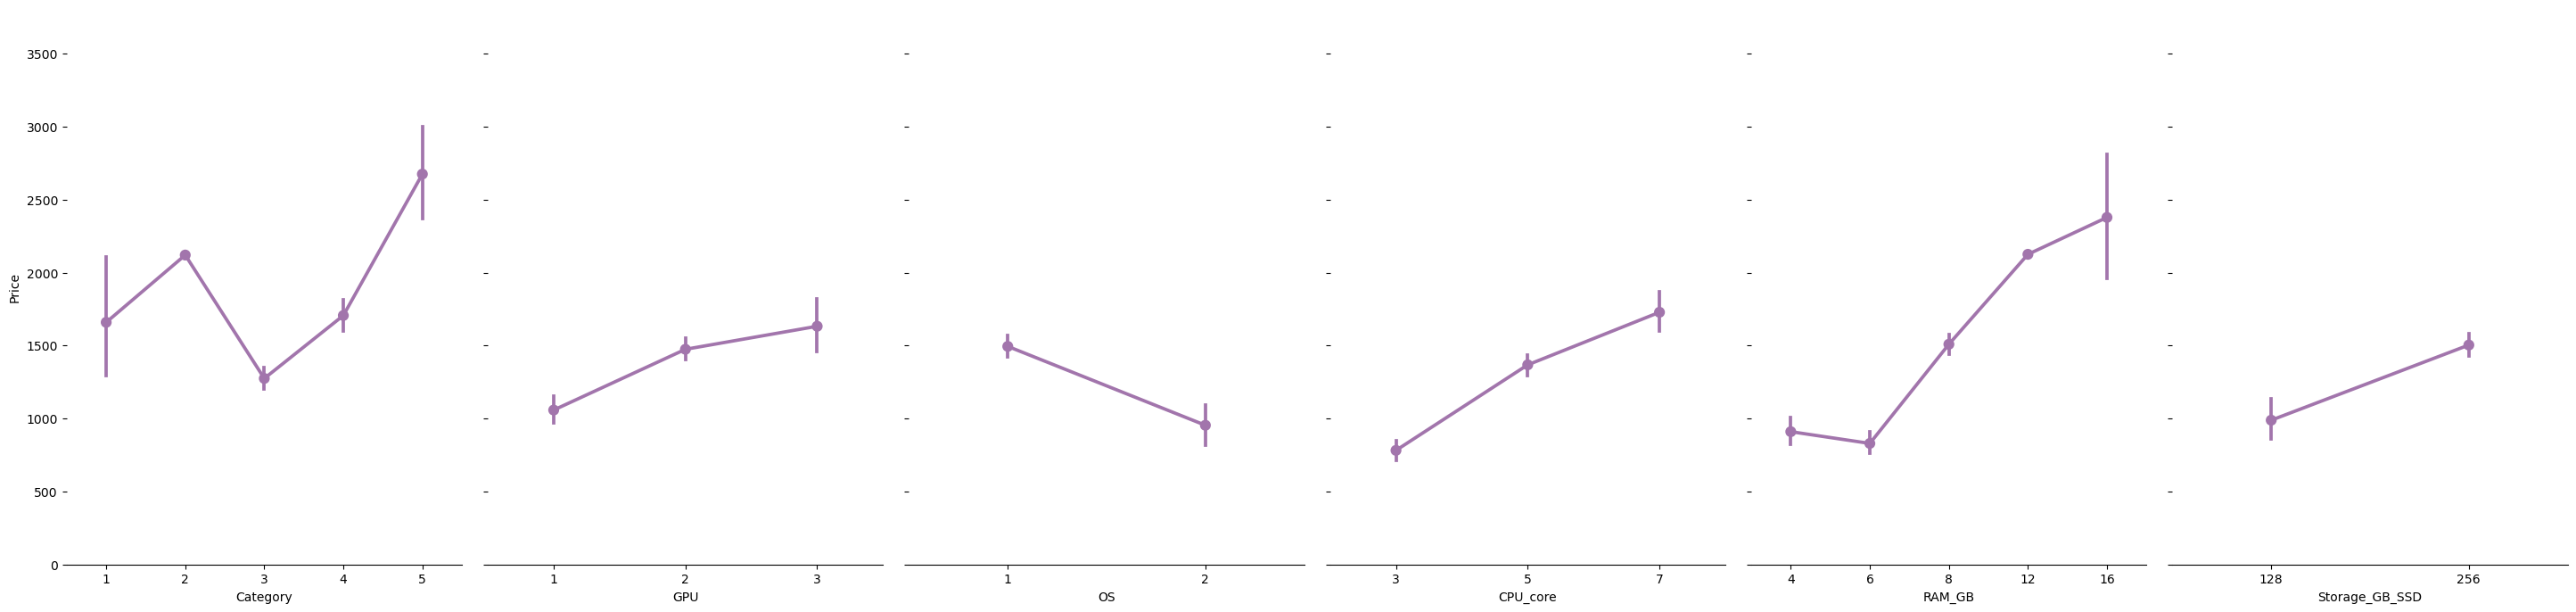

In [50]:
g_catg_ft =sns.PairGrid(df_catg_vals, 
            y_vars='Price',
            x_vars=['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD'],
            height=7,
            aspect=0.7)
g_catg_ft.map(sns.pointplot, color='#a275ac')
g_catg_ft.set(ylim=(0,max(df_catg_vals['Price'])))
sns.despine(fig=g_catg_ft.fig, left=True)

<Axes: xlabel='Category', ylabel='Price'>

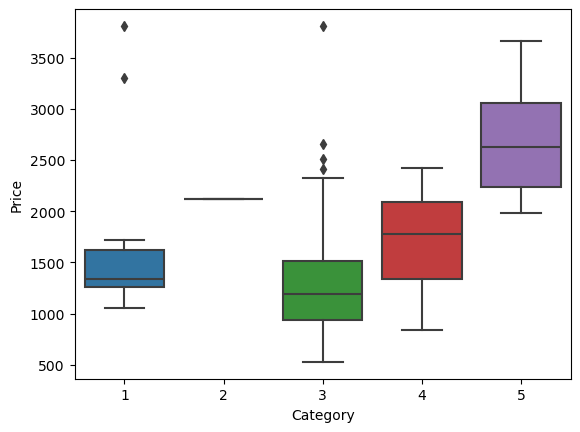

In [51]:
# Write your code below and press Shift+Enter to execute
# Category Box plot
sns.boxplot(x="Category", y="Price", data=df_catg_vals)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Category", y="Price", data=df)
```

</details>


<Axes: xlabel='GPU', ylabel='Price'>

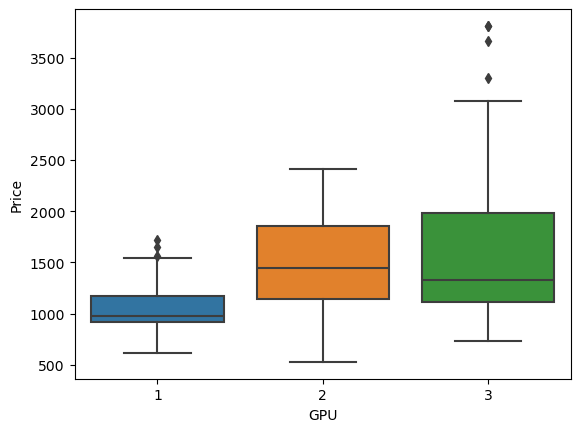

In [52]:
# Write your code below and press Shift+Enter to execute
# GPU Box plot
sns.boxplot(x="GPU", y="Price", data=df_catg_vals)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="GPU", y="Price", data=df)
```

</details>


<Axes: xlabel='OS', ylabel='Price'>

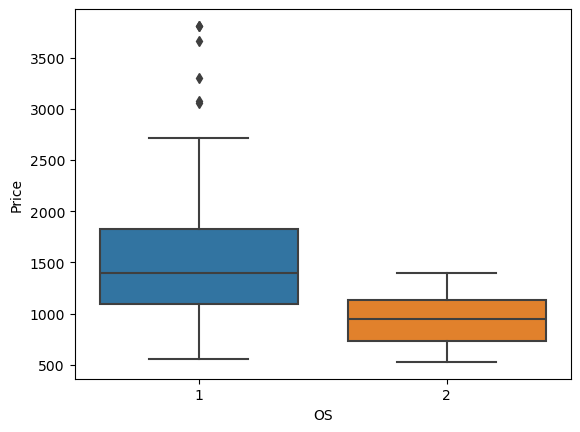

In [53]:
# Write your code below and press Shift+Enter to execute
# OS Box plot
sns.boxplot(x="OS", y="Price", data=df_catg_vals)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="OS", y="Price", data=df)
```

</details>


<Axes: xlabel='CPU_core', ylabel='Price'>

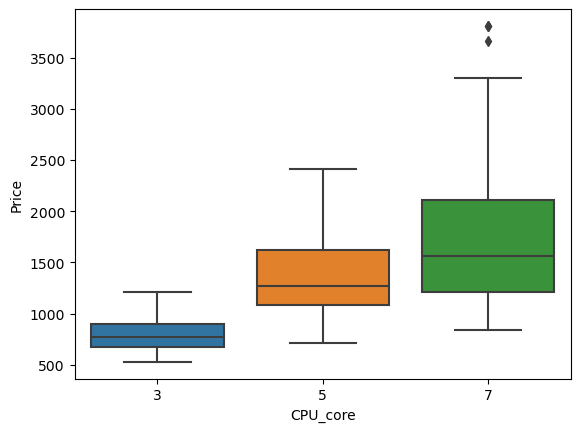

In [54]:
# Write your code below and press Shift+Enter to execute
# CPU_core Box plot
sns.boxplot(x="CPU_core", y="Price", data=df_catg_vals)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="CPU_core", y="Price", data=df)
```

</details>


<Axes: xlabel='RAM_GB', ylabel='Price'>

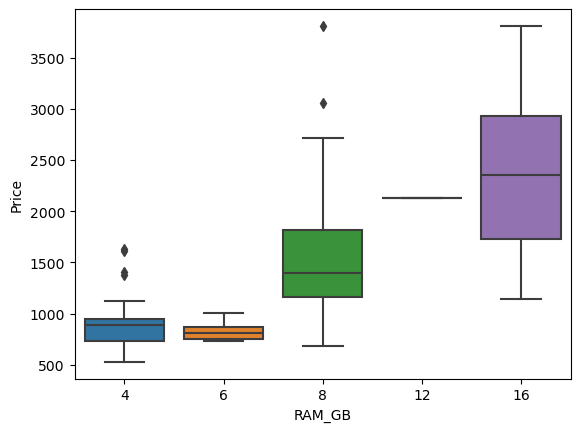

In [55]:
# Write your code below and press Shift+Enter to execute
# RAM_GB Box plot
sns.boxplot(x="RAM_GB", y="Price", data=df_catg_vals)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="RAM_GB", y="Price", data=df)
```

</details>


<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

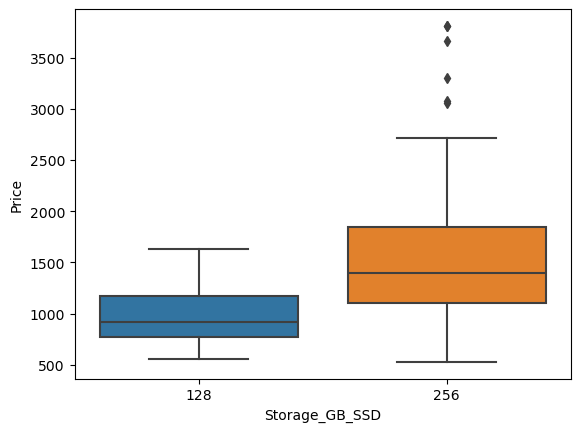

In [56]:
# Write your code below and press Shift+Enter to execute
# Storage_GB_SSD Box plot
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df_catg_vals)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)
```

</details>


# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [59]:
#Generate the statistical summary of the dataframe, including the object type columns
df.describe()

,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Weight_pound,Screen_Size_inch,CPU_frequency_norm
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,37.307395,2.360084,7.882353,245.781513,1.862232,1462.344538,4.106008,14.688655,0.813822
std,0.776533,0.638282,0.235790,1.241787,2.960595,0.411393,2.482603,34.765316,0.489090,574.607699,1.077670,1.166045,0.141860
min,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000,1.790000,12.000000,0.413793
25%,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.472500,1066.500000,3.245000,14.000000,0.689655
50%,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.862232,1333.000000,4.110000,15.000000,0.862069
75%,4.000000,3.000000,1.000000,7.000000,39.620000,2.700000,8.000000,256.000000,2.200000,1777.000000,4.850000,15.600000,0.931034
max,5.000000,3.000000,2.000000,7.000000,43.940000,2.900000,16.000000,256.000000,3.600000,3810.000000,7.940000,17.300000,1.000000


In [60]:
df.describe(include=['object'])

,Manufacturer,Price_binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


<details>
<summary>Click here for Solution</summary>

```python
print(df.describe())
print(df.describe(include=['object']))
```

</details>


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [61]:
#Create a dataframe with the categorical features: GPU, CPU_core to relate them with the Price in a pivot table
df_catg_vals_pivot = df[['GPU', 'CPU_core', 'Price']]
grouped_vals = df_catg_vals_pivot.groupby(['GPU', 'CPU_core'], as_index=False).mean()
grouped_vals

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


<details>
<summary>Click here for Solution</summary>

```python
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)
```

</details>


In [63]:
# Create the Pivot table
grouped_pivot = grouped_vals.pivot(index='GPU', columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

<details>
<summary>Click here for Solution</summary>

```python
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)
```

</details>


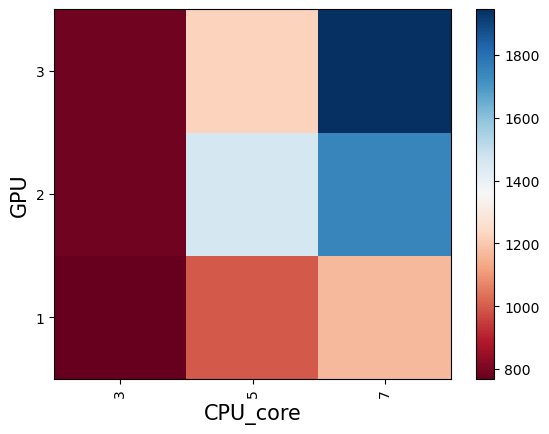

In [67]:
# Write your code below and press Shift+Enter to execute
# Create the Plot
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#Set x-axis and y-axis names
plt.xlabel('CPU_core', fontsize=15)
plt.ylabel('GPU', fontsize=15)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<details>
<summary>Click here for Solution</summary>

```python
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
```

</details>


# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [71]:
#Recap of the correlation and p-value of the attributes tested above with Price
params = ['CPU_frequency', 'Weight_pound','Screen_Size_inch', 'Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']

for param in params:
    print(f'***For the {param.upper()} vs PRICE***')
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(f'The Pearson Correlation Coefficient is {pearson_coef.round(5)} with a P-value of p = {p_value.round(5)} \n')

***For the CPU_FREQUENCY vs PRICE***
The Pearson Correlation Coefficient is 0.36667 with a P-value of p = 0.0 

***For the WEIGHT_POUND vs PRICE***
The Pearson Correlation Coefficient is -0.05022 with a P-value of p = 0.4406 

***For the SCREEN_SIZE_INCH vs PRICE***
The Pearson Correlation Coefficient is -0.11064 with a P-value of p = 0.08853 

***For the CATEGORY vs PRICE***
The Pearson Correlation Coefficient is 0.28624 with a P-value of p = 1e-05 

***For the GPU vs PRICE***
The Pearson Correlation Coefficient is 0.2883 with a P-value of p = 1e-05 

***For the OS vs PRICE***
The Pearson Correlation Coefficient is -0.22173 with a P-value of p = 0.00057 

***For the CPU_CORE vs PRICE***
The Pearson Correlation Coefficient is 0.4594 with a P-value of p = 0.0 

***For the RAM_GB vs PRICE***
The Pearson Correlation Coefficient is 0.5493 with a P-value of p = 0.0 

***For the STORAGE_GB_SSD vs PRICE***
The Pearson Correlation Coefficient is 0.24342 with a P-value of p = 0.00015 



<details>
<summary>Click here for Solution</summary>

```python
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)
```

</details>


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
